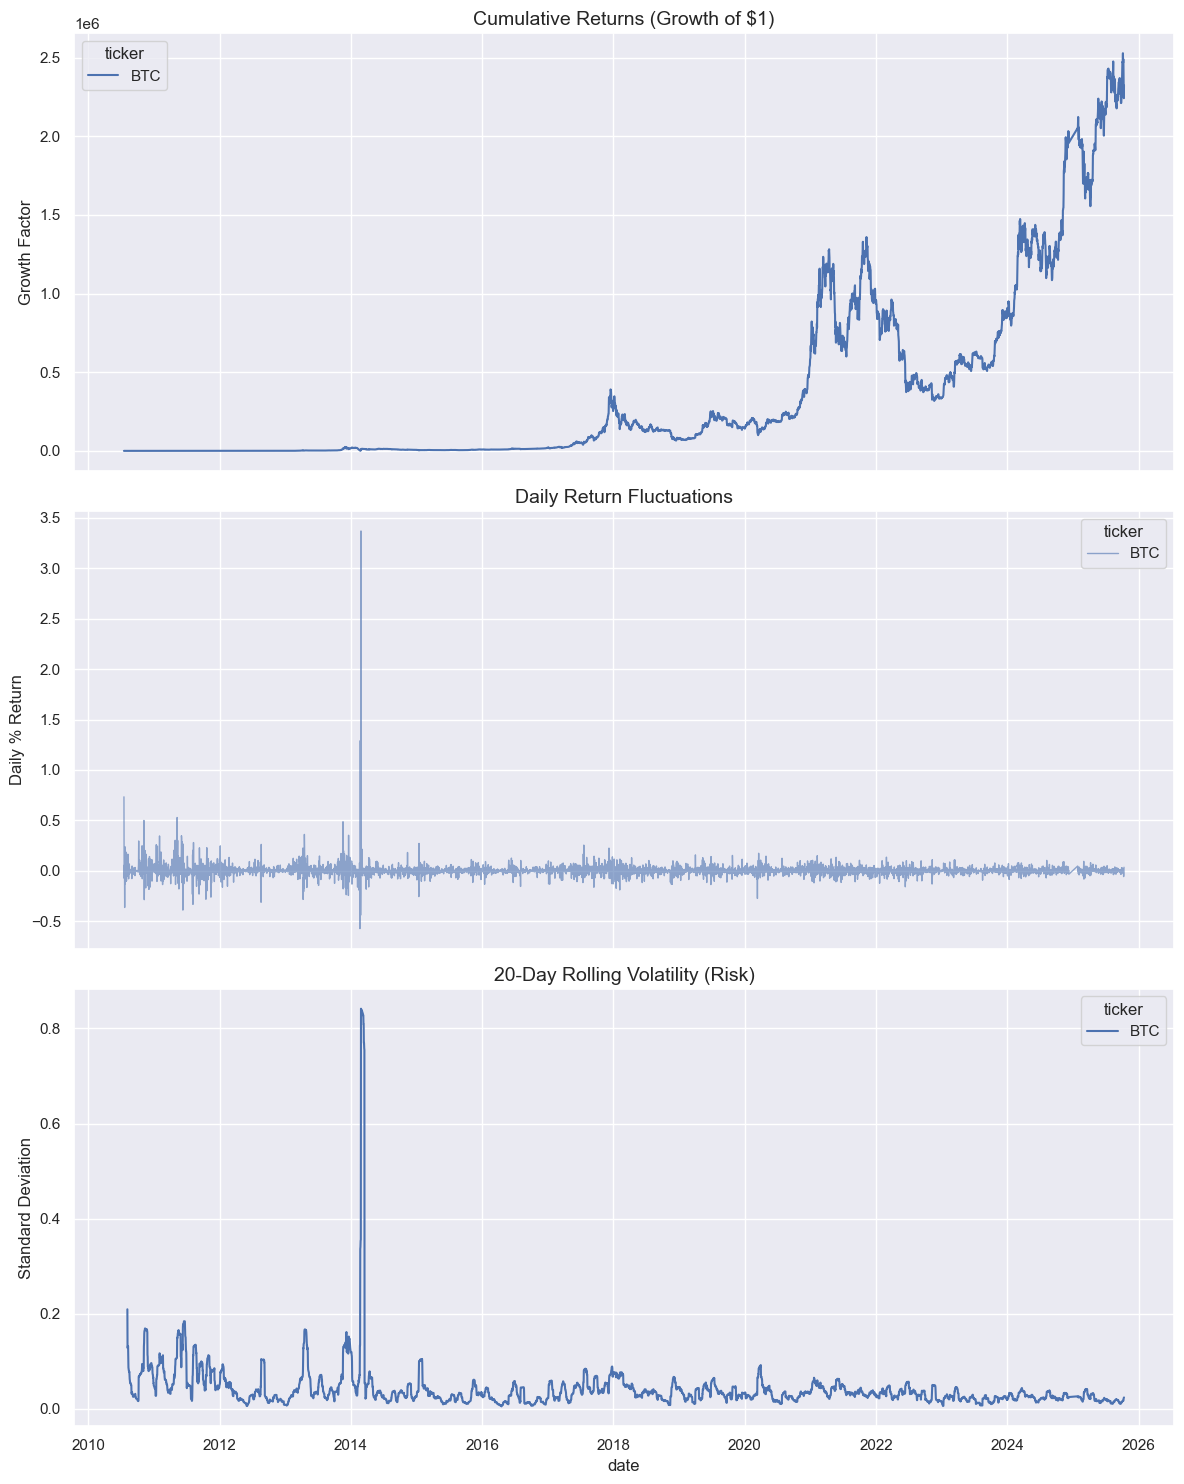

Detailed analysis saved to 'analyzed_time_series.csv'
Correlation-ready file saved to 'returns_for_future_correlation.csv'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. SETUP
# ==========================================
input_file = r"C:\Users\dgara\Documents\Universidad\Florida Tech\Work\Bisk College of Business\Crypto data\BTC.csv" # Change this to your file name
df = pd.read_csv(input_file)

# Convert date to datetime objects
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['ticker', 'date'])

# 2. CALCULATIONS (Feature Engineering)
# ==========================================

# A. Daily Returns (Percentage Change)
df['daily_return'] = df.groupby('ticker')['close'].pct_change()

# B. Cumulative Returns (Growth of $1)
# This shows how much the asset has grown relative to the start date
df['cumulative_return'] = df.groupby('ticker')['daily_return'].transform(
    lambda x: (1 + x).cumprod()
)

# C. Rolling Volatility (Risk)
# 20-day rolling standard deviation (approx 1 month trading)
df['rolling_volatility_20d'] = df.groupby('ticker')['daily_return'].transform(
    lambda x: x.rolling(window=20).std()
)

# 3. VISUALIZATION
# ==========================================
sns.set_theme(style="darkgrid") # Sets a nice visual theme

# Create a figure with 3 subplots stacked vertically
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Plot 1: Cumulative Returns (Performance)
sns.lineplot(data=df, x='date', y='cumulative_return', hue='ticker', ax=axes[0])
axes[0].set_title('Cumulative Returns (Growth of $1)', fontsize=14)
axes[0].set_ylabel('Growth Factor')

# Plot 2: Daily Returns (Noise/Stability)
# We reduce alpha (transparency) to see overlapping data points better
sns.lineplot(data=df, x='date', y='daily_return', hue='ticker', alpha=0.6, linewidth=1, ax=axes[1])
axes[1].set_title('Daily Return Fluctuations', fontsize=14)
axes[1].set_ylabel('Daily % Return')

# Plot 3: Rolling Volatility (Risk Regimes)
sns.lineplot(data=df, x='date', y='rolling_volatility_20d', hue='ticker', ax=axes[2])
axes[2].set_title('20-Day Rolling Volatility (Risk)', fontsize=14)
axes[2].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

# 4. EXPORT FOR FUTURE CORRELATION
# ==========================================

# Save the detailed analysis (for your records)
df.to_csv('analyzed_time_series.csv', index=False)
print("Detailed analysis saved to 'analyzed_time_series.csv'")

# Create the 'Wide' format for correlation
# This pivots the data so Tickers become columns.
# This is crucial for merging with future external data.
correlation_export = df.pivot(index='date', columns='ticker', values='daily_return')

# Save this specific file
correlation_export.to_csv('returns_for_future_correlation.csv')
print("Correlation-ready file saved to 'returns_for_future_correlation.csv'")